In [21]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import time
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

In [7]:
#Rename Class
df.rename(columns={"class": "is_fraudulent_tx"}, inplace=True)

#Percentage of fraud
fraudulent_percentage = df[df.is_fraudulent_tx == 1].is_fraudulent_tx.count() / df.is_fraudulent_tx.count()
print(fraudulent_percentage)

0.001727485630620034


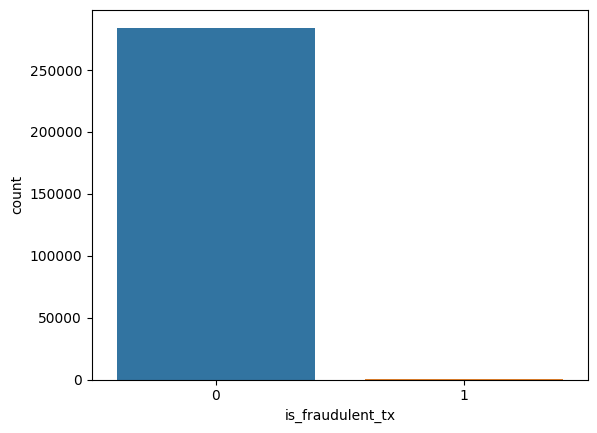

In [8]:
sns.countplot(x= df["is_fraudulent_tx"])
plt.show()

In [9]:
#for column in df.columns:
#    if column != "is_fraudulent_tx" :
#       plt.figure(figsize=(12,8))
#        ax = sns.violinplot(x="is_fraudulent_tx", y=column, data=df)
#        plt.show()

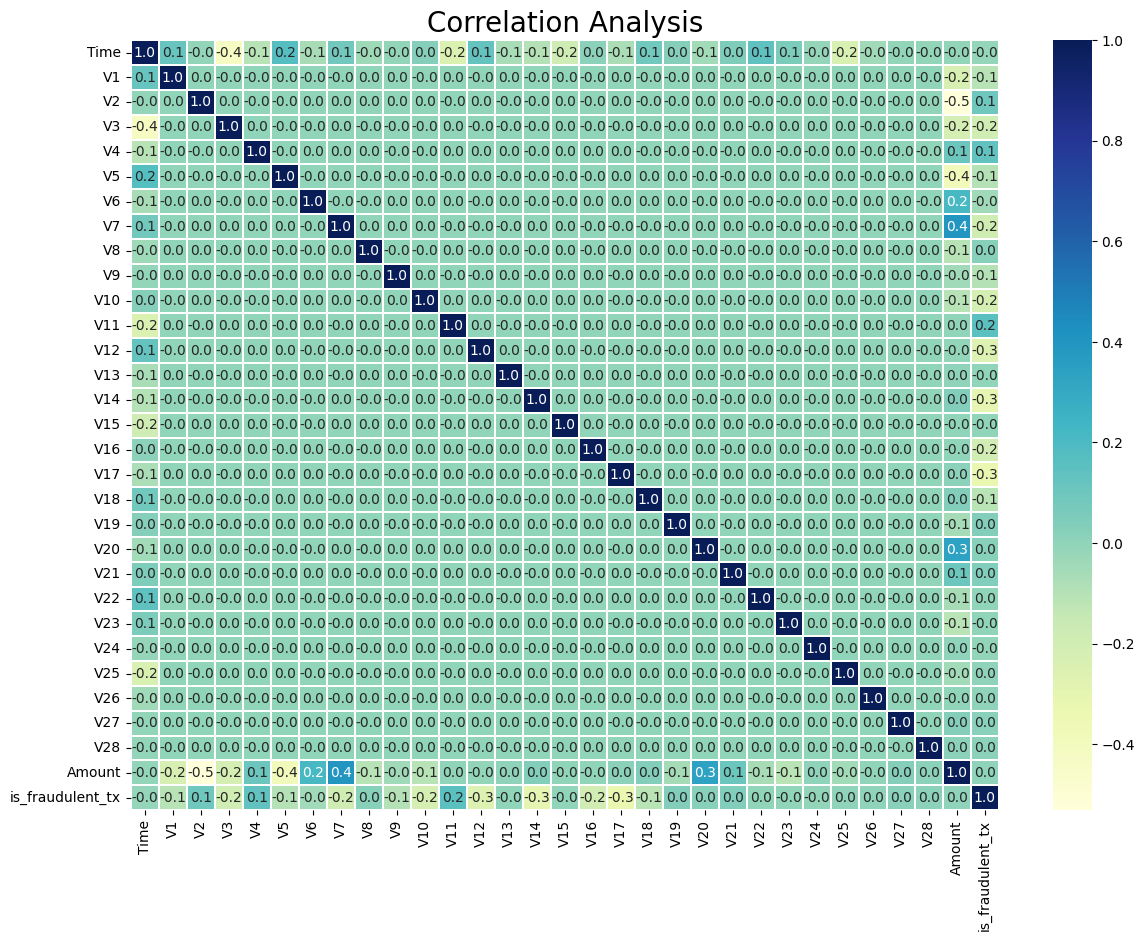

In [10]:
#Correlation Plot
plt.figure(figsize = (14,10))
plt.title('Correlation Analysis', size = 20)
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="YlGnBu",fmt='.1f',annot=True)
plt.show()

**Data Preprocessing**

In [15]:
# Defining x and y
x=df.drop(columns=["is_fraudulent_tx"])
y=df["is_fraudulent_tx"]

#Standardization
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
X_train

array([[-0.87735438, -0.56928155,  0.62712965, ...,  0.56917454,
        -0.21385946, -0.30145418],
       [-1.1530026 ,  0.62719015, -0.08407074, ..., -0.17138914,
         0.00572602, -0.25099833],
       [ 1.26455233,  0.98338459, -0.1202854 , ...,  0.13068173,
        -0.09882842, -0.3256426 ],
       ...,
       [-0.38320914,  0.77225108, -0.57496036, ..., -0.00350659,
         0.01110311, -0.21369618],
       [ 0.05136323,  0.91840013, -1.02936164, ..., -0.08328279,
        -0.09837085,  0.33168275],
       [-0.41961829, -0.3009149 ,  0.45287096, ...,  0.21453163,
         0.35773998, -0.28929999]])

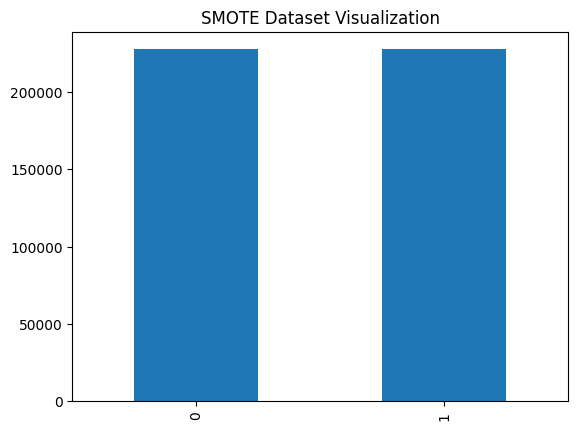

array([[-0.87735438, -0.56928155,  0.62712965, ...,  0.56917454,
        -0.21385946, -0.30145418],
       [-1.1530026 ,  0.62719015, -0.08407074, ..., -0.17138914,
         0.00572602, -0.25099833],
       [ 1.26455233,  0.98338459, -0.1202854 , ...,  0.13068173,
        -0.09882842, -0.3256426 ],
       ...,
       [-0.23012981, -1.89953294,  1.85106319, ...,  2.54284234,
         0.64301255, -0.2700948 ],
       [-0.50584762,  0.09831649,  0.71667435, ...,  0.33257925,
         0.77475073, -0.34446682],
       [-0.0837262 ,  0.43654549, -0.18085522, ..., -0.33755576,
         0.30843098,  1.81152047]])

In [16]:
# SMOTE
X_train_SMOTE, y_train_SMOTE = SMOTE().fit_resample(X_train, y_train)
#SMOTE plot
pd.Series(y_train_SMOTE).value_counts().plot(kind="bar")
plt.title("SMOTE Dataset Visualization")
plt.show()
X_train_SMOTE

In [38]:
class ANN:
    
    def predict(self,X, y, parameters):
        m = X.shape[1]
        p = np.zeros((1,m), dtype = np.int64)
        a3, caches = self.forward_propagation(X, parameters)
        for i in range(0, a3.shape[1]):
            if a3[0,i] > 0.5:
                p[0,i] = 1
            else:
                p[0,i] = 0
        #print("Accuracy: "  + str(np.mean((p[0,:] == y[0]))))
        a=str(np.mean((p[0,:] == y[0])))
        return p,a

    def update_parameters_with_gd(self,parameters, grads, learning_rate):
        L = len(parameters) // 2 # number of layers in the neural networks
        for l in range(L):
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        return parameters

    def backward_propagation(self,X, Y, cache):
        m = X.shape[1]
        (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache

        dz3 = 1./m * (a3 - Y)
        dW3 = np.dot(dz3, a2.T)
        db3 = np.sum(dz3, axis=1, keepdims = True)
        
        da2 = np.dot(W3.T, dz3)
        dz2 = np.multiply(da2, np.int64(a2 > 0))
        dW2 = np.dot(dz2, a1.T)
        db2 = np.sum(dz2, axis=1, keepdims = True)
        
        da1 = np.dot(W2.T, dz2)
        dz1 = np.multiply(da1, np.int64(a1 > 0))
        dW1 = np.dot(dz1, X.T)
        db1 = np.sum(dz1, axis=1, keepdims = True)
        
        gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
        return gradients

    def compute_cost(self,a3, Y):
        m = Y.shape[1]
        logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
        cost = 1./m * np.sum(logprobs)
        return cost

    def relu(self,x):
        s = np.maximum(0,x)
        return s
    
    def sigmoid(self,x):
        s = 1/(1+np.exp(-x))
        return s


    def forward_propagation(self,X, parameters):
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        W3 = parameters["W3"]
        b3 = parameters["b3"]
    
        z1 = np.dot(W1, X) + b1
        a1 = self.relu(z1)
        z2 = np.dot(W2, a1) + b2
        a2 = self.relu(z2)
        z3 = np.dot(W3, a2) + b3
        a3 = self.sigmoid(z3)
    
        cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    
        return a3, cache

    def random_mini_batches(self,X, Y, mini_batch_size = 64, seed = 0):
    
        np.random.seed(seed)            
        m = X.shape[1]                 
        mini_batches = []
        
        permutation = list(np.random.permutation(m))   
        shuffled_X = X[:, permutation]
        shuffled_Y = Y[permutation].values.reshape((1, m))
        #shuffled_Y = Y[permutation].reshape((1, m))
        

        num_complete_minibatches = math.floor(m/mini_batch_size) 
        for k in range(0, num_complete_minibatches):
            mini_batch_X = shuffled_X[:, k * mini_batch_size : (k + 1) * mini_batch_size]
            mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k + 1) * mini_batch_size]
            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)
    
        if m % mini_batch_size != 0:
            mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : ]
            mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : ]
            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)
    
        return mini_batches

    def initialize_parameters(self,layer_dims):
        np.random.seed(3)
        parameters = {}
        L = len(layer_dims) # number of layers in the network

        for l in range(1, L):
            parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*  np.sqrt(2 / layer_dims[l-1])
            parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
            assert (parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
            assert (parameters['W' + str(l)].shape == layer_dims[l], 1)
        
        return parameters
    # GRADED FUNCTION: update_parameters_with_momentum

    def update_parameters_with_momentum(self,parameters, grads, v, beta, learning_rate):
  
        L = len(parameters) // 2
        for l in range(L):
            v["dW" + str(l+1)] = beta * v["dW" + str(l+1)] + (1 - beta) * grads["dW" + str(l+1)]
            v["db" + str(l+1)] = beta * v["db" + str(l+1)] + (1 - beta) * grads["db" + str(l+1)]
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * v["dW" + str(l+1)]
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * v["db" + str(l+1)]
        
        return parameters, v

    def initialize_velocity(self,parameters):
        L = len(parameters) // 2 
        v = {}
        for l in range(L):
            v["dW" + str(l+1)] = np.zeros(parameters["W"+str(l+1)].shape)
            v["db" + str(l+1)] = np.zeros(parameters["b"+str(l+1)].shape)
        return v
    
    def update_parameters_with_adam(self,parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
        L = len(parameters) // 2                 
        v_corrected = {}                         
        s_corrected = {}                         
    
        for l in range(L):
            v["dW" + str(l+1)] = beta1 * v["dW" + str(l+1)] + (1 - beta1) * grads["dW" + str(l+1)]
            v["db" + str(l+1)] = beta1 * v["db" + str(l+1)] + (1 - beta1) * grads["db" + str(l+1)]
            v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] / (1 - beta1)
            v_corrected["db" + str(l+1)] = v["db" + str(l+1)] / (1 - beta1)
            s["dW" + str(l+1)] = beta2 * s["dW" + str(l+1)] + (1 - beta2) * (grads["dW" + str(l+1)] * grads["dW" + str(l+1)])
            s["db" + str(l+1)] = beta2 * s["db" + str(l+1)] + (1 - beta2) * (grads["db" + str(l+1)] * grads["db" + str(l+1)])
            s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] / (1 - beta2)
            s_corrected["db" + str(l+1)] = s["db" + str(l+1)] / (1 - beta2)
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * v_corrected["dW" + str(l+1)] / (np.sqrt(s_corrected["dW" + str(l+1)]) + epsilon)
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * v_corrected["db" + str(l+1)] / (np.sqrt(s_corrected["db" + str(l+1)]) + epsilon)

        return parameters, v, s

    def initialize_adam(self,parameters):
        L = len(parameters) // 2 
        v = {}
        s = {}
        for l in range(L):
            v["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
            v["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
            s["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
            s["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)    
        return v, s
    
    def model(self,X, Y, layers_dims, optimizer, learning_rate = 0.001, mini_batch_size =64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 1000, print_cost = True):
        acc=0
        L = len(layers_dims)            
        costs = []
        accuracy=[]
        t = 0                            
        seed = 10                        
        parameters = self.initialize_parameters(layers_dims)
        
        if optimizer == "gd":
            pass 
        elif optimizer == "momentum":
            v = self.initialize_velocity(parameters)
        elif optimizer == "adam":
            v, s = self.initialize_adam(parameters)
    
        for i in range(num_epochs):
            seed = seed + 1
            minibatches = self.random_mini_batches(X, Y, mini_batch_size, seed)

            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                a3, caches = self.forward_propagation(minibatch_X, parameters)
                cost = self.compute_cost(a3, minibatch_Y)
                grads = self.backward_propagation(minibatch_X, minibatch_Y, caches)
                if optimizer == "gd":
                    parameters = self.update_parameters_with_gd(parameters, grads, learning_rate)
                elif optimizer == "momentum":
                    parameters, v = self.update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
                elif optimizer == "adam":
                    t = t + 1 
                    parameters, v, s = self.update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
            
            if print_cost and i % 100 == 0:
                p,a=self.predict(minibatch_X, minibatch_Y, parameters)
                print ("Cost after epoch %i: %f" %(i, cost),'Accuracy: ',a)
            if print_cost and i % 1 == 0:
                costs.append(cost)
                p,a=self.predict(minibatch_X, minibatch_Y, parameters)
                accuracy.append(float(a))
            if print_cost and i == 999:
                p,a=self.predict(minibatch_X, minibatch_Y, parameters)
                acc=a
                
        
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('epochs (per 100)')
        plt.title("Cost @ Learning rate = " + str(learning_rate))
        plt.show()
        
        plt.plot(accuracy)
        plt.ylabel('accuracy')
        plt.xlabel('epochs (per 100)')
        plt.title("Accuracy @ Learning rate = " + str(learning_rate))
        plt.show()
        print ('Accuracy: ',acc)
        return parameters

Cost after epoch 0: 0.344880 Accuracy:  0.9666666666666667
Cost after epoch 100: nan Accuracy:  1.0
Cost after epoch 200: nan Accuracy:  1.0
Cost after epoch 300: nan Accuracy:  1.0
Cost after epoch 400: nan Accuracy:  1.0
Cost after epoch 500: nan Accuracy:  1.0
Cost after epoch 600: nan Accuracy:  1.0
Cost after epoch 700: nan Accuracy:  1.0
Cost after epoch 800: nan Accuracy:  1.0
Cost after epoch 900: nan Accuracy:  1.0


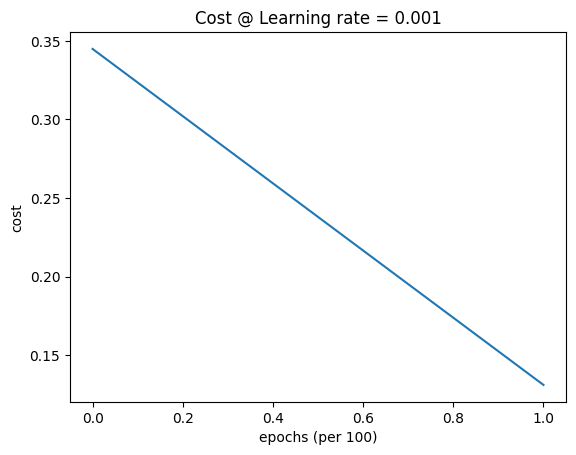

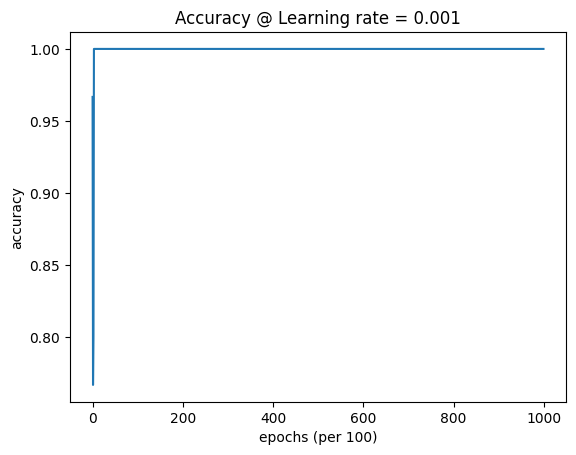

Accuracy:  1.0


In [40]:
layers_dims = [X_train_SMOTE.shape[0], 5,3, 1]
sgd=ANN()
sgd_parameters = sgd.model(X_train_SMOTE, y_train_SMOTE, layers_dims, optimizer = "gd")

Cost after epoch 0: 0.344880 Accuracy:  0.9666666666666667
Cost after epoch 100: 0.000077 Accuracy:  1.0
Cost after epoch 200: 0.000060 Accuracy:  1.0
Cost after epoch 300: 0.000049 Accuracy:  1.0
Cost after epoch 400: 0.000042 Accuracy:  1.0
Cost after epoch 500: 0.000036 Accuracy:  1.0
Cost after epoch 600: 0.000032 Accuracy:  1.0
Cost after epoch 700: 0.000029 Accuracy:  1.0
Cost after epoch 800: 0.000027 Accuracy:  1.0
Cost after epoch 900: 0.000024 Accuracy:  1.0


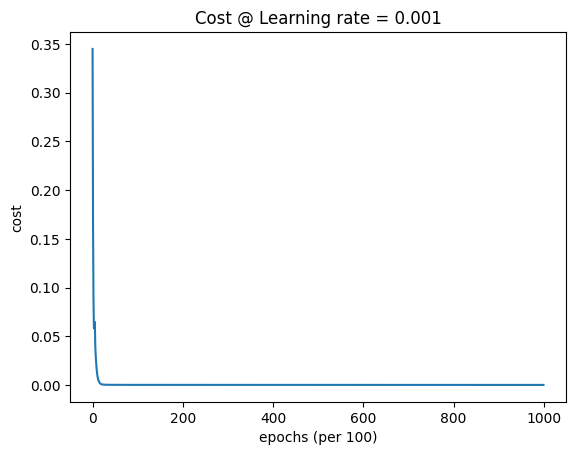

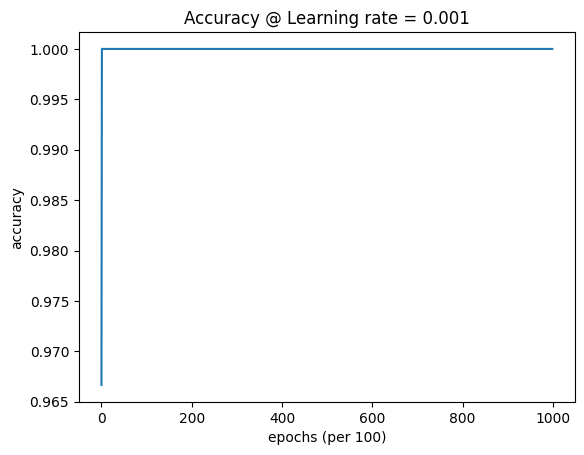

Accuracy:  1.0


In [23]:
moment=ANN()
moment_parameters = moment.model(X_train_SMOTE, y_train_SMOTE, layers_dims, beta = 0.9, optimizer = "momentum")


Cost after epoch 0: 0.344880 Accuracy:  0.9666666666666667
Cost after epoch 100: nan Accuracy:  1.0
Cost after epoch 200: nan Accuracy:  1.0
Cost after epoch 300: nan Accuracy:  1.0
Cost after epoch 400: nan Accuracy:  1.0
Cost after epoch 500: nan Accuracy:  1.0
Cost after epoch 600: nan Accuracy:  1.0
Cost after epoch 700: nan Accuracy:  1.0
Cost after epoch 800: nan Accuracy:  1.0
Cost after epoch 900: nan Accuracy:  1.0


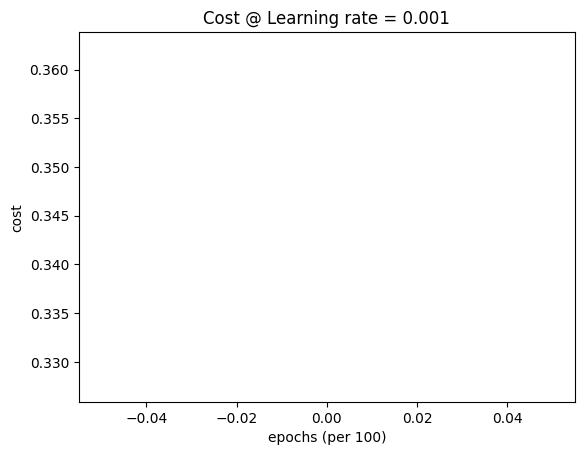

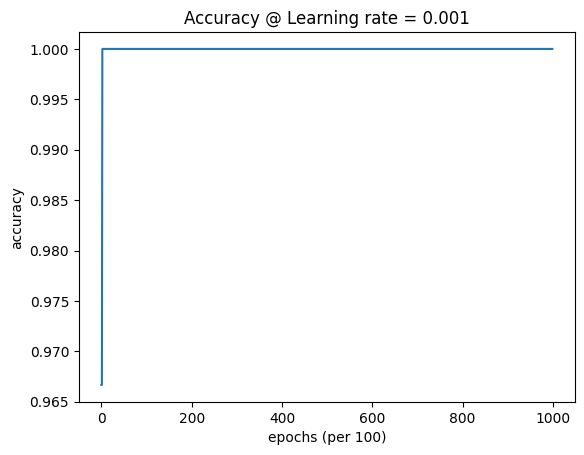

Accuracy:  1.0


In [24]:
adam=ANN()
adam_parameters = adam.model(X_train_SMOTE, y_train_SMOTE, layers_dims, optimizer = "adam")